In [1]:
from pybootnet import *

# Time 2 Analysis

In [2]:
data = pd.read_csv('T2_16s_clr.csv')
new_data = pd.read_csv('T2_16s_clr_clean.csv')

In [ ]:
t2_16s_clean = pd.read_csv('T2_16s_clr_clean.csv')  # Data(Ho et al) is modified where OTU IDs are converted to X# for simplicity

# Preprocessing
# Converting this file to be usable in pybootnet (pandas dataframe)
# Merging on categorical variables allow us to build networks of various categories (Placebo, Letrozole, etc)
category = pd.read_csv('T2_16s_clr.csv')
category = category[['OTUID', 'Category']]
category['OTUID'] = category['OTUID'].str.replace('.', '_')
combined_df = pd.merge(category, t2_16s_clean, on='OTUID', how='right')

In [8]:
combined_df

OTUID   Category        X1        X2        X3        X4        X5  \
0   570_T2    Placebo  7.110789 -1.190607 -1.190607  7.060574  7.026466   
1   571_T2    Placebo  5.817861  5.807334  5.377772  5.535401  5.665454   
2   572_T2    Placebo  3.781326  4.139835  4.237473  4.009960  4.045806   
3   573_T2    Placebo  4.301329  4.251936  3.732636  3.987883  4.025623   
4   574_T2    Placebo  3.954115  3.837954  3.310239  3.467525  3.687847   
5   575_T2    Placebo  4.377898  4.387317  3.994275  4.026168  3.970854   
6   576_T2    Placebo  4.147578  3.893663  3.745139  3.883192  4.018366   
7   577_T2    Placebo  5.391281  5.487295  5.421817  5.999528  5.231949   
8   578_T2  Letrozole  5.148919  5.196597  4.823007  4.811172  4.650053   
9   580_T2  Letrozole  3.445880  3.851345  3.299276  3.299276 -2.003271   
10  581_T2  Letrozole  4.691787  5.064462  4.754308  4.921362 -1.207628   
11  582_T2  Letrozole  4.019195  4.334712  4.466771  4.081715  4.126167   
12  583_T2  Letrozole  3.927570  4.054860  3.852417  3.900045  3.812611   
13  584_T2  Letrozole  4.941264  5.089684  4.833431  4.997434  4.909658   
14  585_T2  Letrozole -0.697070 -0.697070  7.256484  7.295057 -0.697070   
15  586_T2  Letrozole  7.658160  7.603556 -0.785196 -0.785196 -0.785196   
16  588_T2       Co-P  4.278911  4.272177  4.318390  4.368715  4.107271   
17  589_T2       Co-L  5.755420  6.009551  5.750331  5.665173  5.654000   
18  590_T2       Co-P  5.369099  5.254090  5.065656  4.902546  5.055572   
19  592_T2       Co-P  4.900059  4.645104  4.006024  4.057317  4.110427   
20  593_T2       Co-L  4.046228  3.797532  3.306124  3.397932  3.603376   
21  594_T2       Co-P  2.599161  2.080036  1.792354  2.438099  2.185397   
22  595_T2       Co-L  5.787527  5.393405 -2.150168  5.068073  5.096737   
23  596_T2       Co-P  5.806367  5.657552  5.105785  5.173118  5.331909   
24  597_T2       Co-L  5.403202  5.346650  5.114374  4.966321  4.976903   
25  598_T2       Co-P  4.771001  4.415476  3.967237  4.024681  4.247825   
26  599_T2       Co-L  5.440618  5.290137  4.732655  4.804629  4.946803   
27  600_T2       Co-P  3.708140  3.530981  3.147739  3.022027  3.339630   
28  601_T2       Co-L  3.463000  3.640242  3.311640  3.286948  3.134670   
29  602_T2       Co-P  2.979504  2.844468  2.641452  2.597447  2.643909   
30  603_T2       Co-L  2.659667  2.484491  2.535389  2.422481  2.449061   

          X6        X7        X8  ...      X183      X184      X185      X186  \
0  -1.190607 -1.190607 -1.190607  ... -1.190607 -1.190607 -1.190607 -1.190607   
1   5.478242  4.869653  5.284086  ... -1.427706 -1.427706 -1.427706 -1.427706   
2   4.207972  4.249034  3.808477  ... -2.568100 -2.568100  2.918620 -2.568100   
3   4.111752  3.546050  3.659073  ... -2.642098 -2.642098 -2.642098 -2.642098   
4   3.555123  2.649527  3.133397  ...  1.819805 -3.329203 -3.329203  2.885356   
5   4.087056  3.478809  3.766491  ... -2.656133  3.282435 -2.656133 -2.656133   
6   3.845654  3.431958  3.616344  ...  1.968372 -3.182932 -3.182932  2.596981   
7   5.724425  5.053257  5.126588  ...  4.142386 -1.578473 -1.578473 -1.578473   
8   4.694505  4.457893  4.507490  ... -2.311592 -2.311592 -2.311592  4.129860   
9   3.650674 -2.003271 -2.003271  ... -2.003271 -2.003271 -2.003271 -2.003271   
10  4.868718  4.813148  4.971372  ... -1.207628 -1.207628 -1.207628 -1.207628   
11  4.002934  3.986405  4.050943  ... -2.040760 -2.040760 -2.040760 -2.040760   
12  3.781680  4.116655  3.885993  ... -2.810907 -2.810907 -2.810907  1.748283   
13  4.843283  4.712549  4.734649  ... -2.204650 -2.204650 -2.204650  4.099874   
14 -0.697070  7.316448 -0.697070  ...  6.628578 -0.697070 -0.697070 -0.697070   
15 -0.785196 -0.785196 -0.785196  ...  5.880789  5.821949 -0.785196 -0.785196   
16  4.202219  4.251699  4.176529  ... -2.703106 -2.703106  2.137166 -2.703106   
17  5.760484  5.448950  5.362566  ... -1.426894 -1.426894 -1.426894 -1.426894   
18  5.133533  4.590959  4.829044  ... -2.135374  3.819559 -2.1353

In [10]:
# Separating the data frame based on the 'Category' column
placebo = combined_df[combined_df['Category'] == 'Placebo']
letrozole = combined_df[combined_df['Category'] == 'Letrozole']
co_placebo = combined_df[combined_df['Category'] == 'Co-P']
co_letrozole = combined_df[combined_df['Category'] == 'Co-L']


In [12]:
placebo

OTUID Category        X1        X2        X3        X4        X5  \
0  570_T2  Placebo  7.110789 -1.190607 -1.190607  7.060574  7.026466   
1  571_T2  Placebo  5.817861  5.807334  5.377772  5.535401  5.665454   
2  572_T2  Placebo  3.781326  4.139835  4.237473  4.009960  4.045806   
3  573_T2  Placebo  4.301329  4.251936  3.732636  3.987883  4.025623   
4  574_T2  Placebo  3.954115  3.837954  3.310239  3.467525  3.687847   
5  575_T2  Placebo  4.377898  4.387317  3.994275  4.026168  3.970854   
6  576_T2  Placebo  4.147578  3.893663  3.745139  3.883192  4.018366   
7  577_T2  Placebo  5.391281  5.487295  5.421817  5.999528  5.231949   

         X6        X7        X8  ...      X183      X184      X185      X186  \
0 -1.190607 -1.190607 -1.190607  ... -1.190607 -1.190607 -1.190607 -1.190607   
1  5.478242  4.869653  5.284086  ... -1.427706 -1.427706 -1.427706 -1.427706   
2  4.207972  4.249034  3.808477  ... -2.568100 -2.568100  2.918620 -2.568100   
3  4.111752  3.546050  3.659073  ... -2.642098 -2.642098 -2.642098 -2.642098   
4  3.555123  2.649527  3.133397  ...  1.819805 -3.329203 -3.329203  2.885356   
5  4.087056  3.478809  3.766491  ... -2.656133  3.282435 -2.656133 -2.656133   
6  3.845654  3.431958  3.616344  ...  1.968372 -3.182932 -3.182932  2.596981   
7  5.724425  5.053257  5.126588  ...  4.142386 -1.578473 -1.578473 -1.578473   

       X187      X188      X189      X190      X191      X192  
0  4.928262 -1.190607  4.702590 -1.190607 -1.190607 -1.190607  
1 -1.427706 -1.427706 -1.427706 -1.427706 -1.427706 -1.427706  
2 -2.568100 -2.568100 -2.568100 -2.568100 -2.568100 -2.568100  
3 -2.642098 -2.642098 -2.642098 -2.642098 -2.642098  3.017983  
4 -3.329203  2.333066 -3.329203  1.717151 -3.329203  0.780381  
5 -2.656133 -2.656133 -2.656133  2.746131 -2.656133 -2.656133  
6 -3.182932  1.469381 -3.182932 -3.182932 -3.182932  1.121074  
7 -1.578473 -1.578473 -1.578473 -1.578473 -1.578473 -1.578473  

[8 rows x 194 columns]

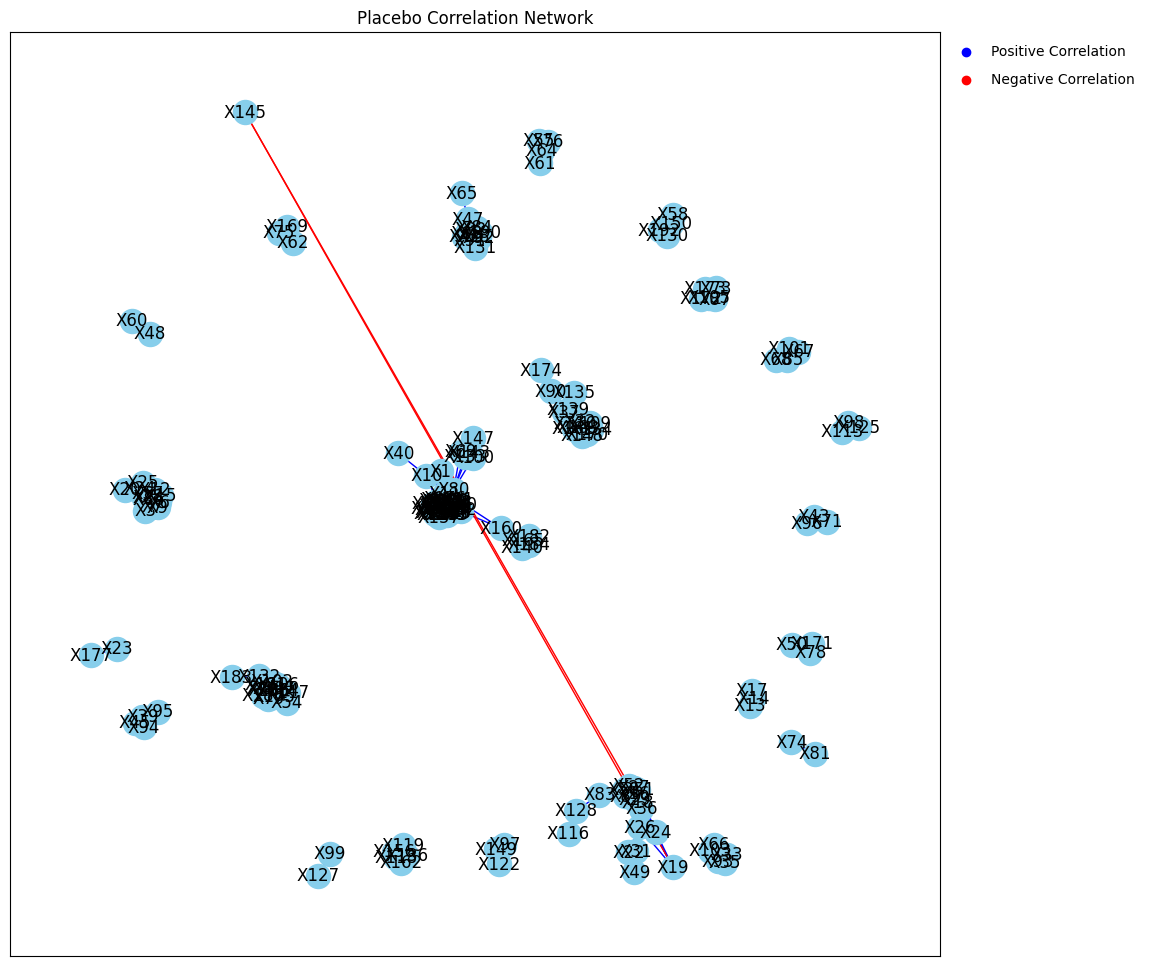

In [ ]:
placebo_boot = bootstrap_replicates(placebo, 500) # Creates # of bootstrap replicates
placebo_corr = correlation_matrix(placebo_boot)
build_network_graph(placebo_corr, 0.8, title="Placebo Correlation Network")

In [ ]:
build_negative_networks

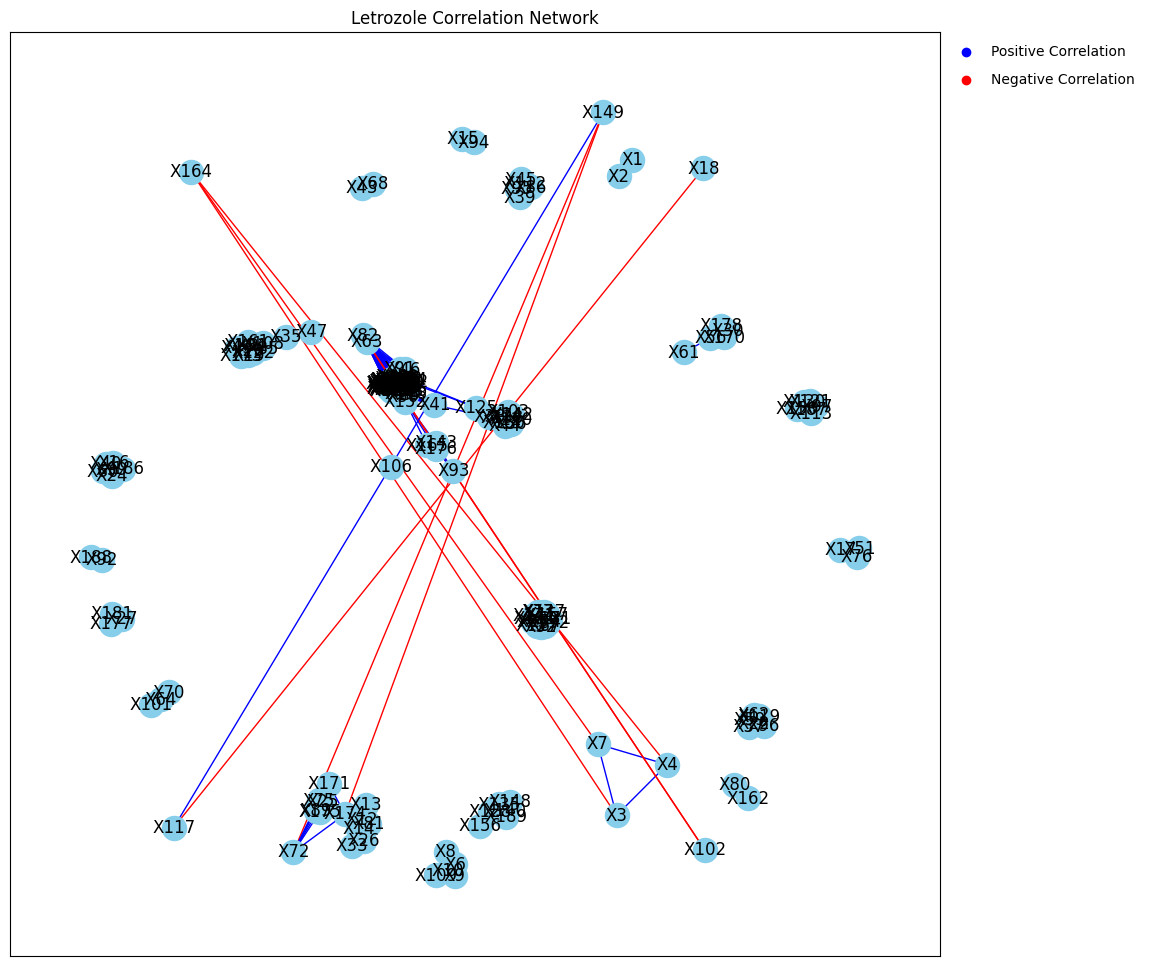

In [ ]:
letrozole_boot = bootstrap_replicates(letrozole, 500)
letrozole_corr = correlation_matrix(letrozole_boot)
build_network_graph(letrozole_corr, 0.8, title="Letrozole Correlation Network")

# Alternative Networks
Build_positive

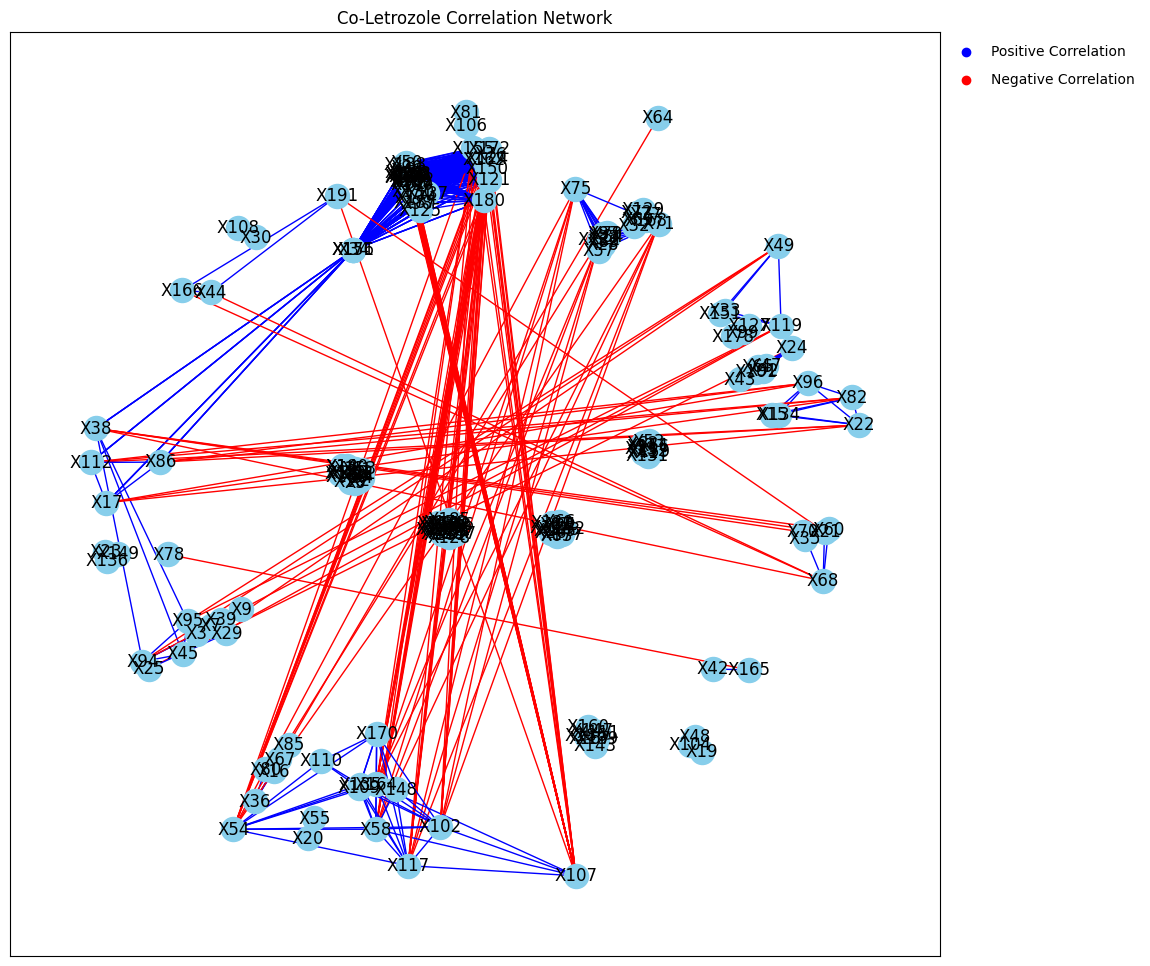

In [ ]:
co_letrozole_boot = bootstrap_replicates(co_letrozole, 500)
co_letrozole_corr = correlation_matrix(co_letrozole_boot)
build_network_graph(co_letrozole_corr, 0.8, title="Co-Letrozole Correlation Network")

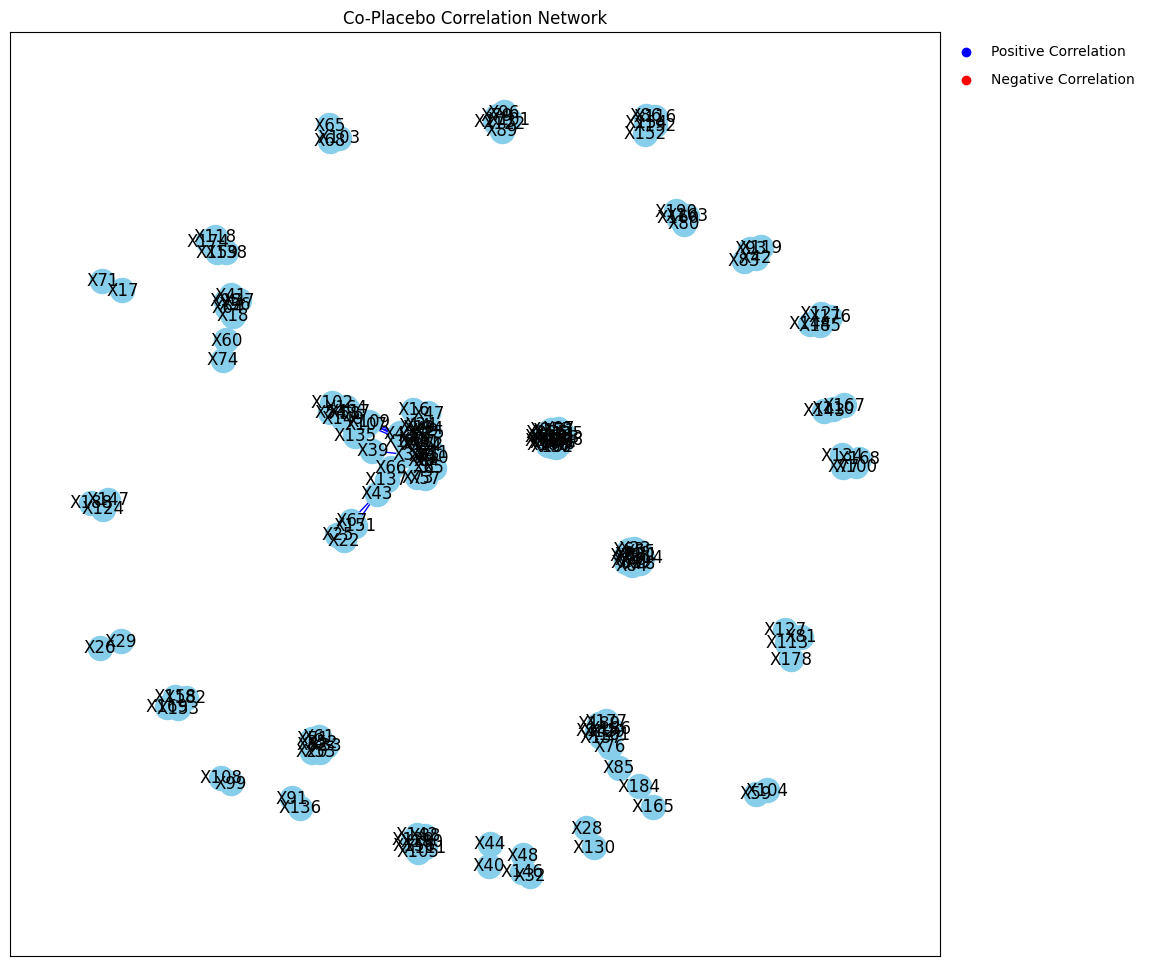

In [ ]:
co_placebo_boot = bootstrap_replicates(co_placebo, 500)
co_placebo_corr = correlation_matrix(co_placebo_boot)
build_network_graph(co_placebo_corr, 0.8, title="Co-Placebo Correlation Network")

In [20]:
letrozole_stat = calculate_network_statistics(letrozole_corr, 0.8)
placebo_stat = calculate_network_statistics(placebo_corr, 0.8)
co_letrozole_stat = calculate_network_statistics(co_letrozole_corr, 0.8)
co_placebo_stat = calculate_network_statistics(co_placebo_corr, 0.8)

In [21]:
project_stats = {
    'Letrozole' : letrozole_stat,
    'Placebo' : placebo_stat,
    'Co-L' : co_letrozole_stat,
    'Co-P' : co_placebo_stat
}

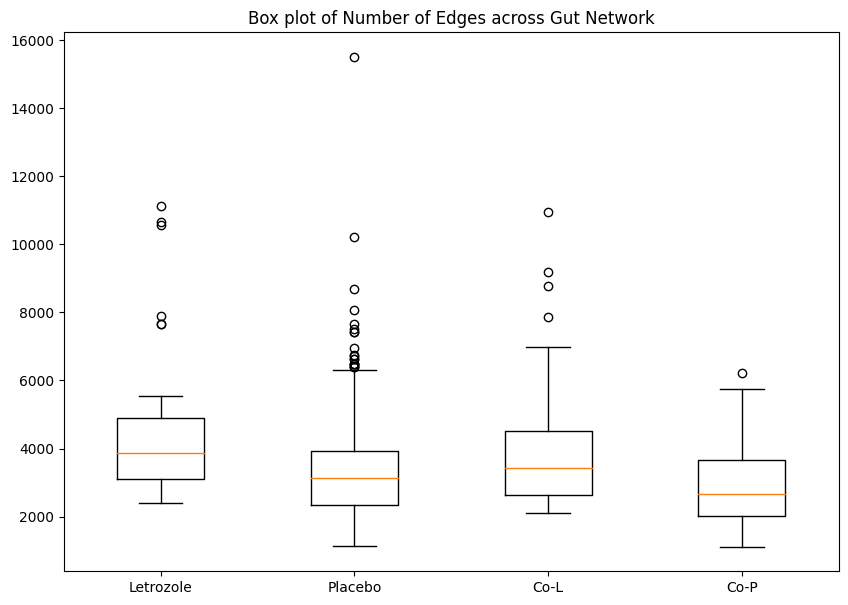

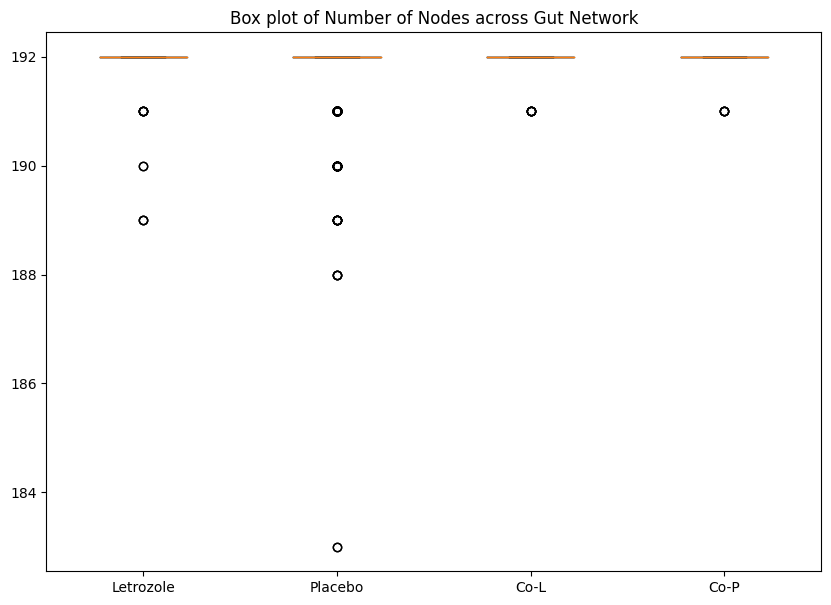

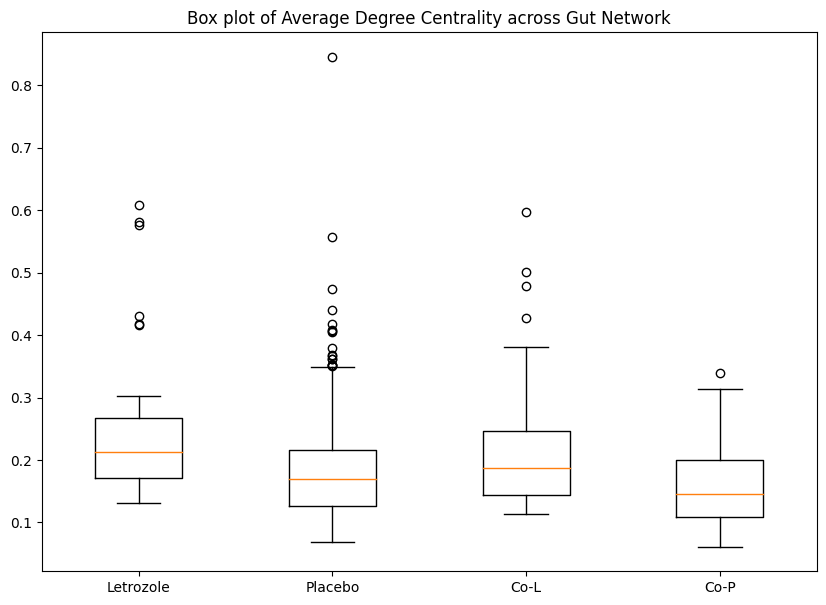

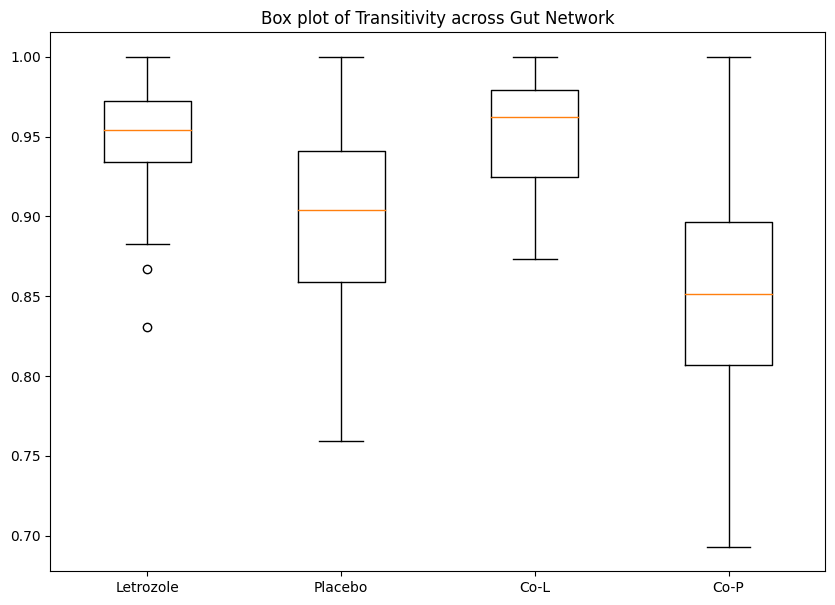

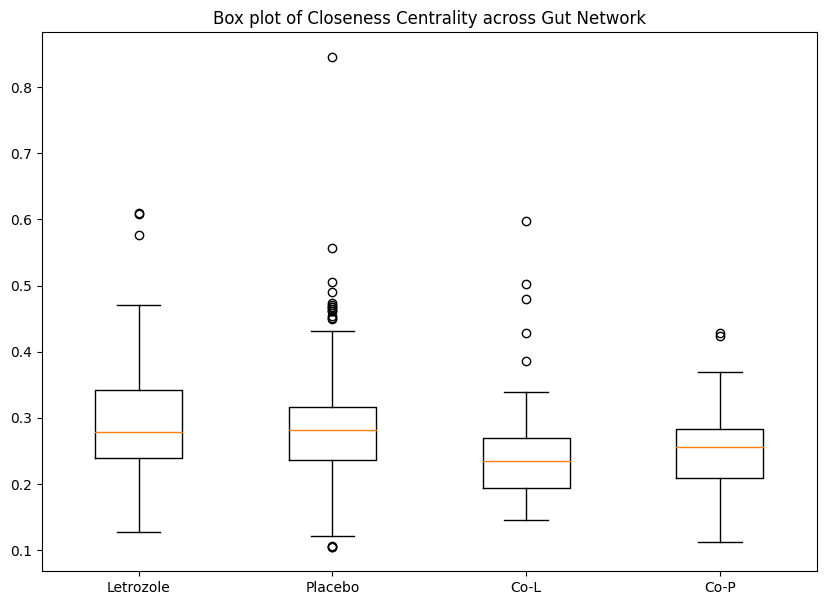

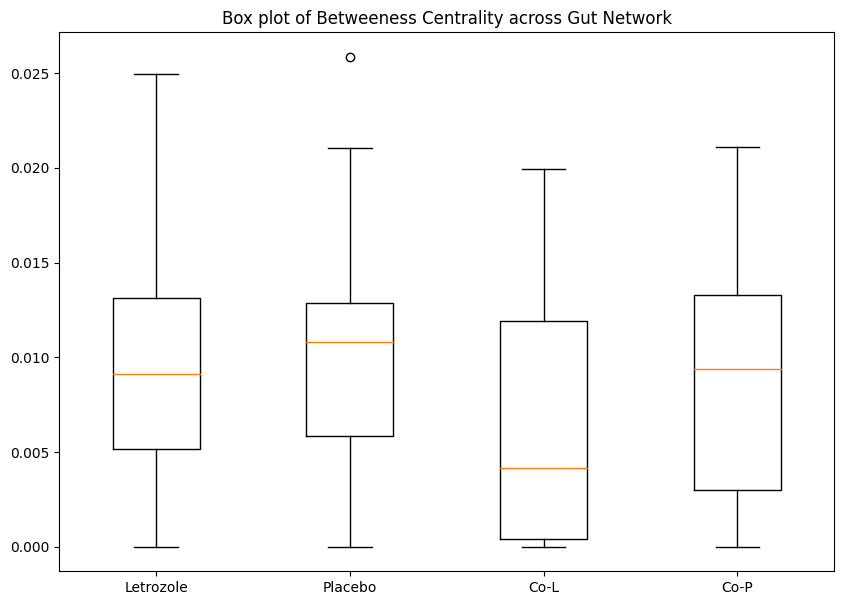

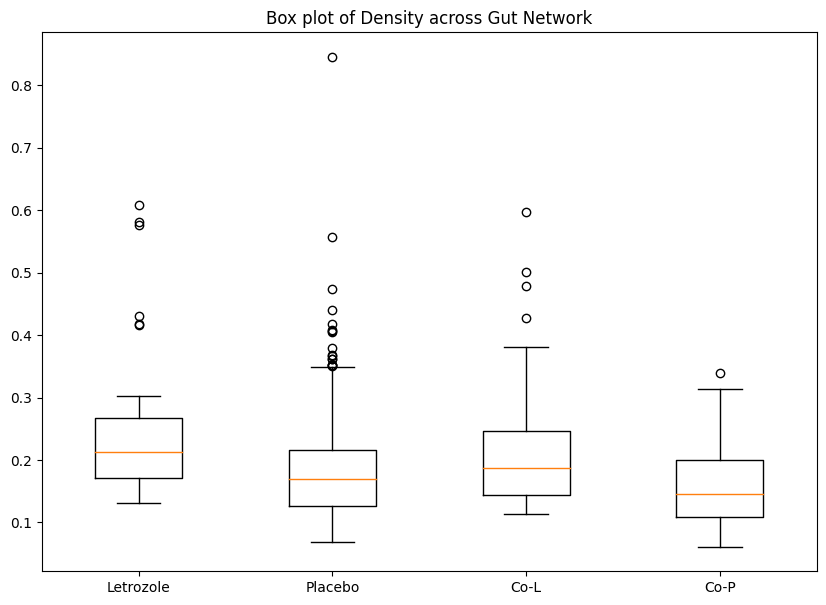

Letrozole_mean  Letrozole_sem  Placebo_mean  \
Number of Edges                  4453.080        291.801      3368.364   
Number of Nodes                   191.620          0.117       191.636   
Average Degree Centrality           0.244          0.016         0.184   
Transitivity                        0.949          0.005         0.900   
Closeness Centrality                0.303          0.015         0.279   
Betweeness Centrality               0.009          0.001         0.009   
Density                             0.244          0.016         0.184   

                           Placebo_sem  Co-L_mean  Co-L_sem  Co-P_mean  \
Number of Edges                 66.090   4080.360   279.595   2960.840   
Number of Nodes                  0.041    191.860     0.050    191.900   
Average Degree Centrality        0.004      0.223     0.015      0.161   
Transitivity                     0.002      0.953     0.005      0.851   
Closeness Centrality             0.003      0.254     0.013      0.250   
Betweeness Centrality            0.000      0.007     0.001      0.009   
Density                          0.004      0.223     0.015      0.161   

                           Co-P_sem  
Number of Edges             183.785  
Number of Nodes               0.043  
Average Degree Centrality     0.010  
Transitivity                  0.010  
Closeness Centrality          0.010  
Betweeness Centrality         0.001  
Density                       0.010

In [24]:
analyze_network_statistics(project_stats, filename='gut_network_stats.csv', project_name='Gut Network')

In [25]:
net_stat_binomial_test(letrozole_stat, placebo_stat, title='placebo letrozole binom.csv')

Bootstrap replicates not equal numbers


In [97]:
net_stat_binomial_test(co_letrozole_stat, co_placebo_stat, title='co-L co-P binom.csv')

{'Number of Edges': BinomTestResult(k=3865, n=5000, alternative='two-sided', statistic=0.773, pvalue=0.0),
 'Number of Nodes': BinomTestResult(k=417, n=5000, alternative='two-sided', statistic=0.0834, pvalue=0.0),
 'Average Degree Centrality': BinomTestResult(k=3865, n=5000, alternative='two-sided', statistic=0.773, pvalue=0.0),
 'Transitivity': BinomTestResult(k=4530, n=5000, alternative='two-sided', statistic=0.906, pvalue=0.0),
 'Closeness Centrality': BinomTestResult(k=2463, n=5000, alternative='two-sided', statistic=0.4926, pvalue=0.30189552895241983),
 'Betweeness Centrality': BinomTestResult(k=1497, n=5000, alternative='two-sided', statistic=0.2994, pvalue=7.121331573513704e-182),
 'Density': BinomTestResult(k=3865, n=5000, alternative='two-sided', statistic=0.773, pvalue=0.0)}

In [98]:
net_stat_binomial_test(placebo_stat, co_placebo_stat, title='placebo co-P binom.csv')

{'Number of Edges': BinomTestResult(k=3019, n=5000, alternative='two-sided', statistic=0.6038, pvalue=4.9008903637134576e-49),
 'Number of Nodes': BinomTestResult(k=399, n=5000, alternative='two-sided', statistic=0.0798, pvalue=0.0),
 'Average Degree Centrality': BinomTestResult(k=3022, n=5000, alternative='two-sided', statistic=0.6044, pvalue=1.3733042556579487e-49),
 'Transitivity': BinomTestResult(k=3565, n=5000, alternative='two-sided', statistic=0.713, pvalue=1.398534467751033e-205),
 'Closeness Centrality': BinomTestResult(k=3021, n=5000, alternative='two-sided', statistic=0.6042, pvalue=2.100379486417506e-49),
 'Betweeness Centrality': BinomTestResult(k=2366, n=5000, alternative='two-sided', statistic=0.4732, pvalue=0.00015886548836856982),
 'Density': BinomTestResult(k=3022, n=5000, alternative='two-sided', statistic=0.6044, pvalue=1.3733042556579487e-49)}

In [99]:
net_stat_binomial_test(letrozole_stat, co_letrozole_stat, title='letrozole co-L binom.csv')

{'Number of Edges': BinomTestResult(k=2466, n=5000, alternative='two-sided', statistic=0.4932, pvalue=0.3433731218706863),
 'Number of Nodes': BinomTestResult(k=554, n=5000, alternative='two-sided', statistic=0.1108, pvalue=0.0),
 'Average Degree Centrality': BinomTestResult(k=2474, n=5000, alternative='two-sided', statistic=0.4948, pvalue=0.4707599302332179),
 'Transitivity': BinomTestResult(k=2363, n=5000, alternative='two-sided', statistic=0.4726, pvalue=0.00011260134262616828),
 'Closeness Centrality': BinomTestResult(k=3041, n=5000, alternative='two-sided', statistic=0.6082, pvalue=3.654918332733659e-53),
 'Betweeness Centrality': BinomTestResult(k=3413, n=5000, alternative='two-sided', statistic=0.6826, pvalue=2.793024458624389e-150),
 'Density': BinomTestResult(k=2474, n=5000, alternative='two-sided', statistic=0.4948, pvalue=0.4707599302332179)}

# Time 5 Analysis

In [100]:
t5_16s_clean = pd.read_csv('t5_16s_clean.csv')
categoryt5 = pd.read_csv('T5_16s_clr.csv')
categoryt5 = categoryt5[['OTUID', 'Category']]
categoryt5['OTUID'] = categoryt5['OTUID'].str.replace('.', '_')
combined_t5 = pd.merge(categoryt5, t5_16s_clean, on='OTUID', how='right')

In [101]:
# Separating the data frame based on the 'Category' column
placebot5 = combined_t5[combined_t5['Category'] == 'Placebo']
letrozolet5 = combined_t5[combined_t5['Category'] == 'Letrozole']
co_placebot5 = combined_t5[combined_t5['Category'] == 'Co-P']
co_letrozolet5 = combined_t5[combined_t5['Category'] == 'Co-L']


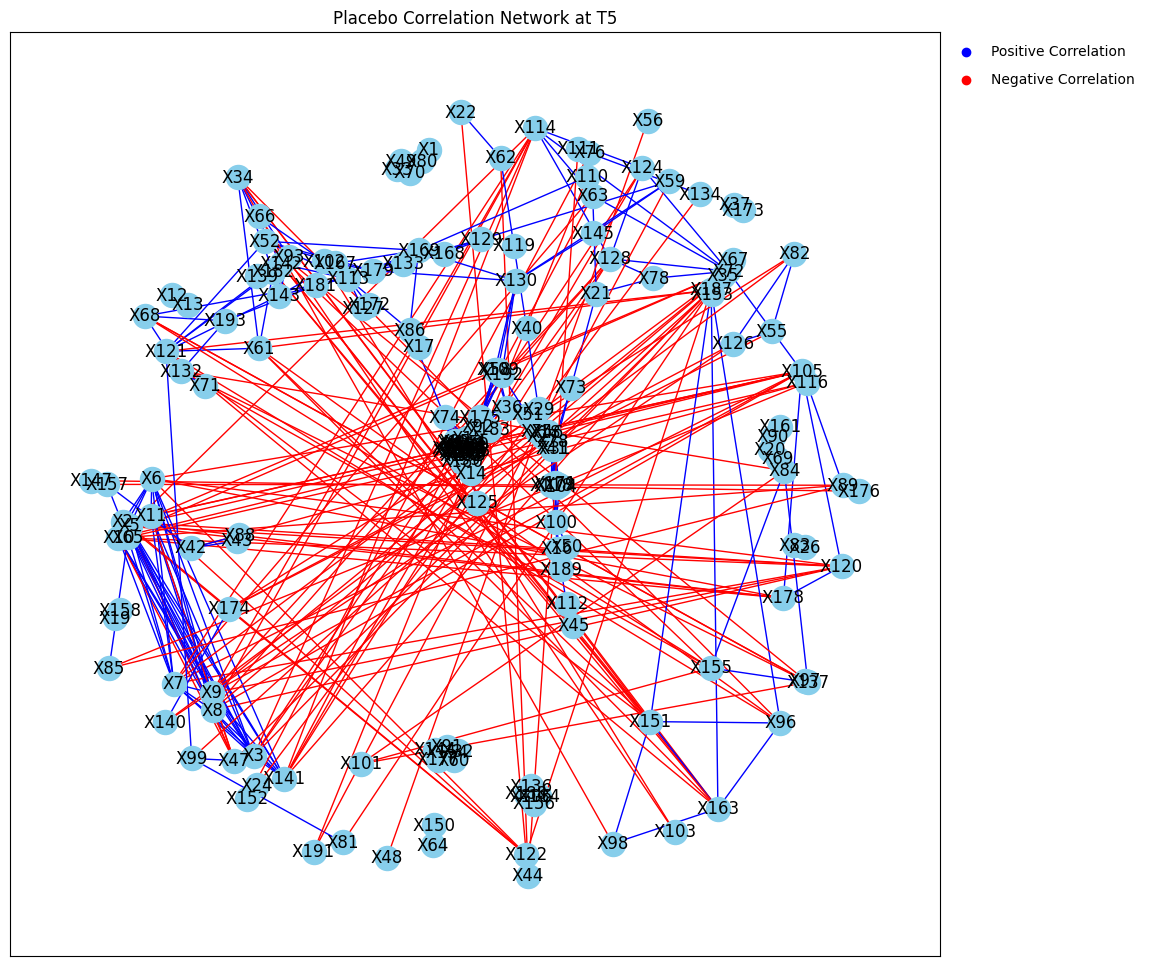

In [ ]:
placebo_boot_t5 = bootstrap_replicates(placebot5, 500)
placebo_corr_t5 = correlation_matrix(placebo_boot_t5)
build_network_graph(placebo_corr_t5, 0.8, title="Placebo Correlation Network at T5")

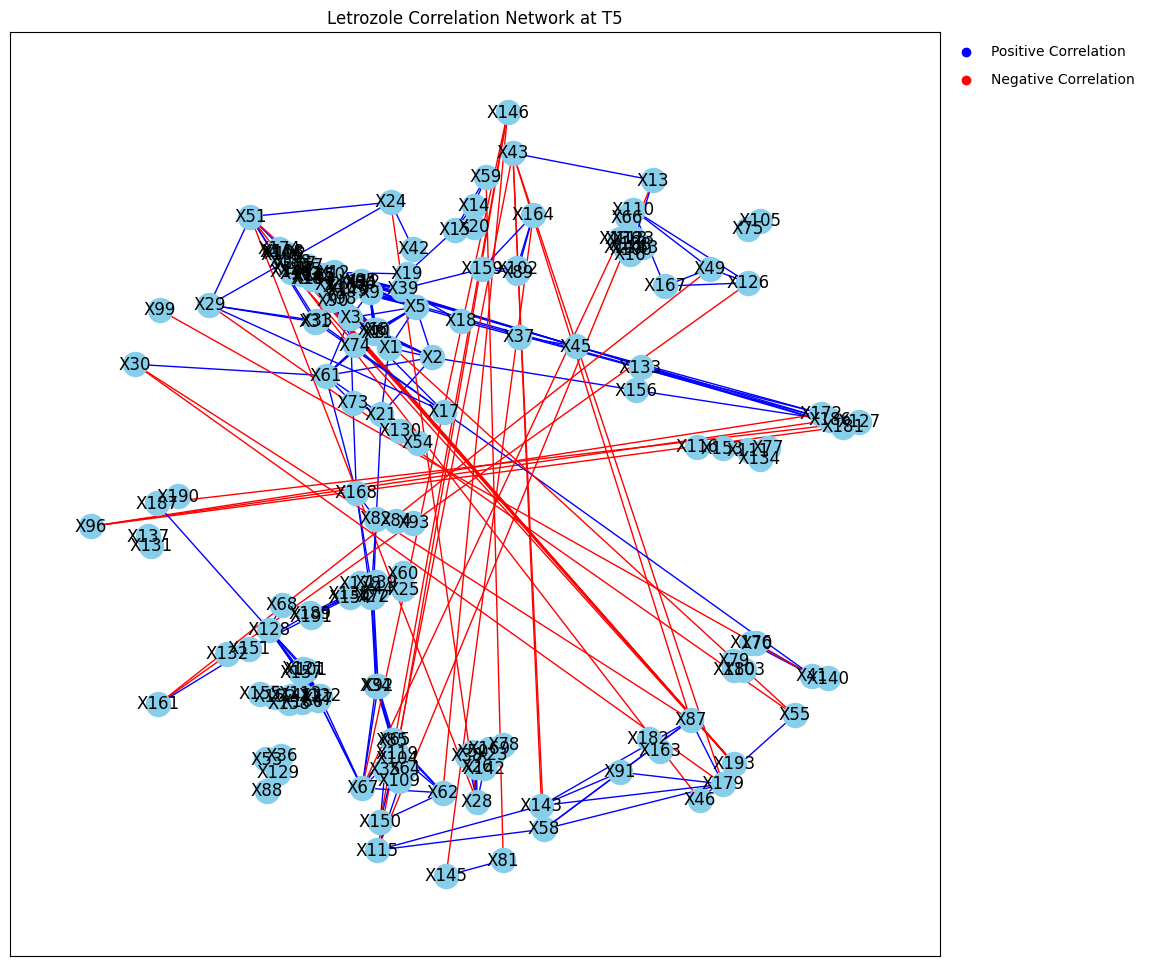

In [ ]:
letrozole_boot_t5 = bootstrap_replicates(letrozolet5, 500)
letrozole_corr_t5 = correlation_matrix(letrozole_boot_t5)
build_network_graph(letrozole_corr_t5, 0.8, title="Letrozole Correlation Network at T5")

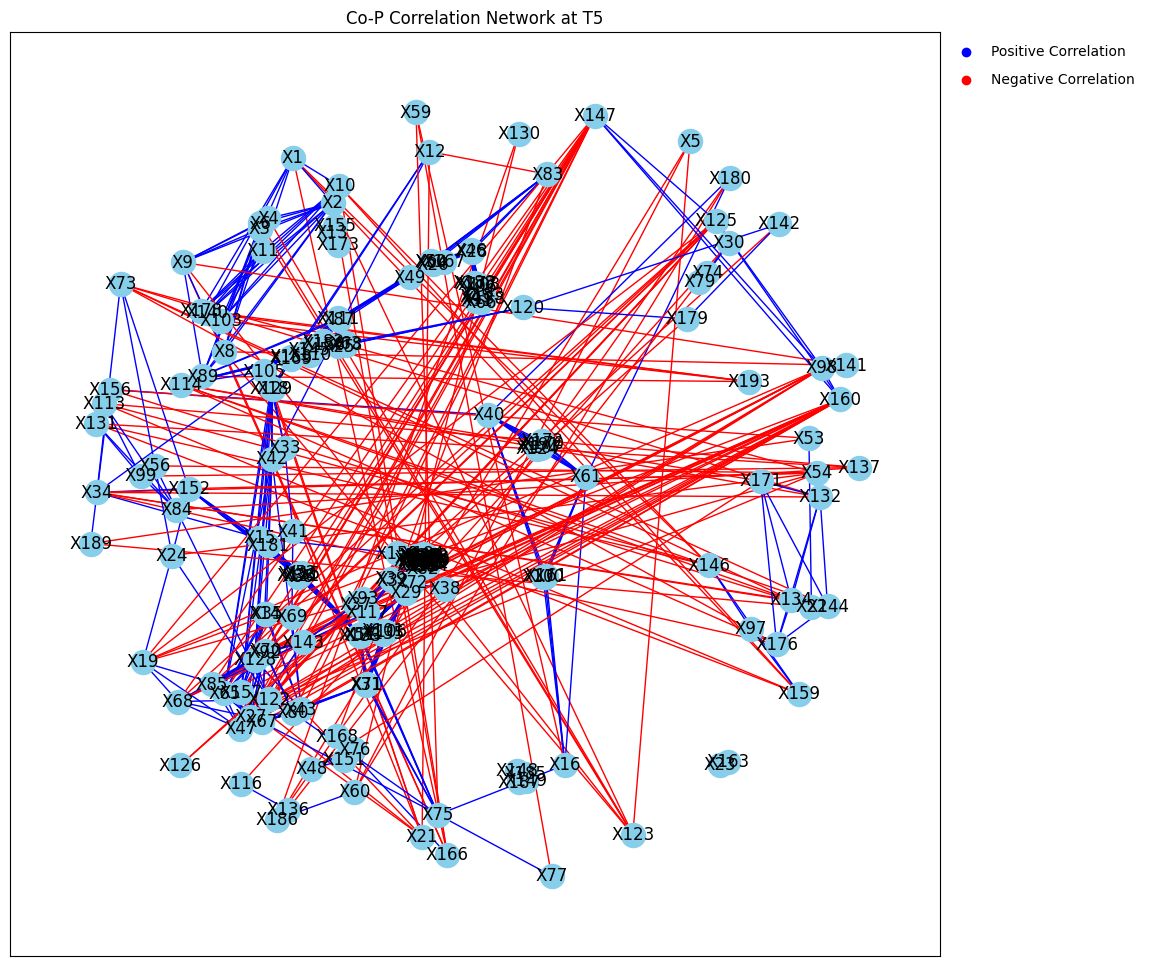

In [ ]:
co_placebo_boot_t5 = bootstrap_replicates(co_placebot5, 500)
co_placebo_corr_t5 = correlation_matrix(co_placebo_boot_t5)
build_network_graph(co_placebo_corr_t5, 0.8, title="Co-P Correlation Network at T5")

In [ ]:
l2 = top_nodes(letrozole_corr, num_nodes=20) # What is a top node? 
#l5 = top_nodes(letrozole_corr_t5, num_nodes=20)
p2 = top_nodes(placebo_corr, num_nodes=20)
#p5 = top_nodes(placebo_corr_t5, num_nodes=20)

In [ ]:
# To get the names of the top nodes:

In [29]:
p2

['X115',
 'X121',
 'X124',
 'X126',
 'X129',
 'X137',
 'X144',
 'X146',
 'X151',
 'X153',
 'X154',
 'X155',
 'X158',
 'X159',
 'X166',
 'X167',
 'X168',
 'X176',
 'X179',
 'X187']

In [106]:
species_dictionary = pd.read_csv('species_dictionary_phyloseq.csv')


In [107]:
species_dictionary['Taxa'] = species_dictionary['Phylum'] + ', ' + species_dictionary['Class'] + ', ' + species_dictionary['Order'] + ', ' + species_dictionary['Family'] + ', ' + species_dictionary['Genus']
species_dict = species_dictionary[['Feature.ID','Taxa']]
species_dict.set_index('Feature.ID', inplace=True)

In [108]:
# Create a dictionary for quick ID to Taxon lookup
id_to_taxon_dict = species_dict['Taxa'].to_dict()

# Example mapping function that takes a list of Feature IDs and returns their corresponding Taxon names
def map_ids_to_taxon(id_list):
    return [id_to_taxon_dict.get(x_id) for x_id in id_list]


In [109]:
map_ids_to_taxon(l2)

[' p__Bacteroidetes,  c__Bacteroidia,  o__Bacteroidales,  f__S24-7,  g__',
 ' p__Bacteroidetes,  c__Bacteroidia,  o__Bacteroidales,  f__S24-7,  g__',
 ' p__Bacteroidetes,  c__Bacteroidia,  o__Bacteroidales,  f__S24-7,  g__',
 ' p__Bacteroidetes,  c__Bacteroidia,  o__Bacteroidales,  f__S24-7,  g__',
 ' p__Bacteroidetes,  c__Bacteroidia,  o__Bacteroidales,  f__S24-7,  g__',
 ' p__Bacteroidetes,  c__Bacteroidia,  o__Bacteroidales,  f__S24-7,  g__',
 ' p__Bacteroidetes,  c__Bacteroidia,  o__Bacteroidales,  f__S24-7,  g__',
 ' p__Bacteroidetes,  c__Bacteroidia,  o__Bacteroidales,  f__S24-7,  g__',
 ' p__Bacteroidetes,  c__Bacteroidia,  o__Bacteroidales,  f__S24-7,  g__',
 ' p__Bacteroidetes,  c__Bacteroidia,  o__Bacteroidales,  f__S24-7,  g__',
 ' p__Bacteroidetes,  c__Bacteroidia,  o__Bacteroidales,  f__S24-7,  g__',
 ' p__Bacteroidetes,  c__Bacteroidia,  o__Bacteroidales,  f__S24-7,  g__',
 ' p__Bacteroidetes,  c__Bacteroidia,  o__Bacteroidales,  f__Prevotellaceae,  g__Prevotella',
 ' p__

In [110]:
map_ids_to_taxon(l5)

[' p__Firmicutes,  c__Bacilli,  o__Lactobacillales,  f__Lactobacillaceae,  g__Lactobacillus',
 ' p__Bacteroidetes,  c__Bacteroidia,  o__Bacteroidales,  f__Prevotellaceae,  g__Prevotella',
 ' p__Bacteroidetes,  c__Bacteroidia,  o__Bacteroidales,  f__S24-7,  g__',
 ' p__Firmicutes,  c__Bacilli,  o__Lactobacillales,  f__Lactobacillaceae,  g__Lactobacillus',
 ' p__Bacteroidetes,  c__Bacteroidia,  o__Bacteroidales,  f__S24-7,  g__',
 ' p__Bacteroidetes,  c__Bacteroidia,  o__Bacteroidales,  f__S24-7,  g__',
 ' p__Bacteroidetes,  c__Bacteroidia,  o__Bacteroidales,  f__S24-7,  g__',
 ' p__Bacteroidetes,  c__Bacteroidia,  o__Bacteroidales,  f__[Paraprevotellaceae],  g__CF231',
 ' p__Bacteroidetes,  c__Bacteroidia,  o__Bacteroidales,  f__Prevotellaceae,  g__Prevotella',
 ' p__Bacteroidetes,  c__Bacteroidia,  o__Bacteroidales,  f__[Paraprevotellaceae],  g__CF231',
 ' p__Deferribacteres,  c__Deferribacteres,  o__Deferribacterales,  f__Deferribacteraceae,  g__Mucispirillum',
 ' p__Deferribacteres, 

In [111]:
map_ids_to_taxon(p2)

[' p__Bacteroidetes,  c__Bacteroidia,  o__Bacteroidales,  f__S24-7,  g__',
 ' p__Bacteroidetes,  c__Bacteroidia,  o__Bacteroidales,  f__S24-7,  g__',
 ' p__Bacteroidetes,  c__Bacteroidia,  o__Bacteroidales,  f__S24-7,  g__',
 ' p__Bacteroidetes,  c__Bacteroidia,  o__Bacteroidales,  f__S24-7,  g__',
 ' p__Bacteroidetes,  c__Bacteroidia,  o__Bacteroidales,  f__S24-7,  g__',
 ' p__Bacteroidetes,  c__Bacteroidia,  o__Bacteroidales,  f__S24-7,  g__',
 ' p__Bacteroidetes,  c__Bacteroidia,  o__Bacteroidales,  f__S24-7,  g__',
 ' p__Bacteroidetes,  c__Bacteroidia,  o__Bacteroidales,  f__S24-7,  g__',
 ' p__Bacteroidetes,  c__Bacteroidia,  o__Bacteroidales,  f__S24-7,  g__',
 ' p__Bacteroidetes,  c__Bacteroidia,  o__Bacteroidales,  f__S24-7,  g__',
 ' p__Bacteroidetes,  c__Bacteroidia,  o__Bacteroidales,  f__S24-7,  g__',
 ' p__Bacteroidetes,  c__Bacteroidia,  o__Bacteroidales,  f__S24-7,  g__',
 ' p__Bacteroidetes,  c__Bacteroidia,  o__Bacteroidales,  f__S24-7,  g__',
 ' p__Firmicutes,  c__Bac

In [112]:
map_ids_to_taxon(p5)

[' p__Bacteroidetes,  c__Bacteroidia,  o__Bacteroidales,  f__S24-7,  g__',
 ' p__Firmicutes,  c__Bacilli,  o__Lactobacillales,  f__Lactobacillaceae,  g__Lactobacillus',
 ' p__Firmicutes,  c__Bacilli,  o__Lactobacillales,  f__Lactobacillaceae,  g__Lactobacillus',
 ' p__Bacteroidetes,  c__Bacteroidia,  o__Bacteroidales,  f__S24-7,  g__',
 ' p__Bacteroidetes,  c__Bacteroidia,  o__Bacteroidales,  f__S24-7,  g__',
 ' p__Firmicutes,  c__Bacilli,  o__Lactobacillales,  f__Lactobacillaceae,  g__Lactobacillus',
 ' p__Firmicutes,  c__Bacilli,  o__Lactobacillales,  f__Lactobacillaceae,  g__Lactobacillus',
 ' p__Firmicutes,  c__Bacilli,  o__Lactobacillales,  f__Lactobacillaceae,  g__Lactobacillus',
 ' p__Firmicutes,  c__Bacilli,  o__Lactobacillales,  f__Lactobacillaceae,  g__Lactobacillus',
 ' p__Firmicutes,  c__Bacilli,  o__Lactobacillales,  f__Lactobacillaceae,  g__Lactobacillus',
 ' p__Firmicutes,  c__Clostridia,  o__Clostridiales,  f__,  g__',
 ' p__Bacteroidetes,  c__Bacteroidia,  o__Bacteroid

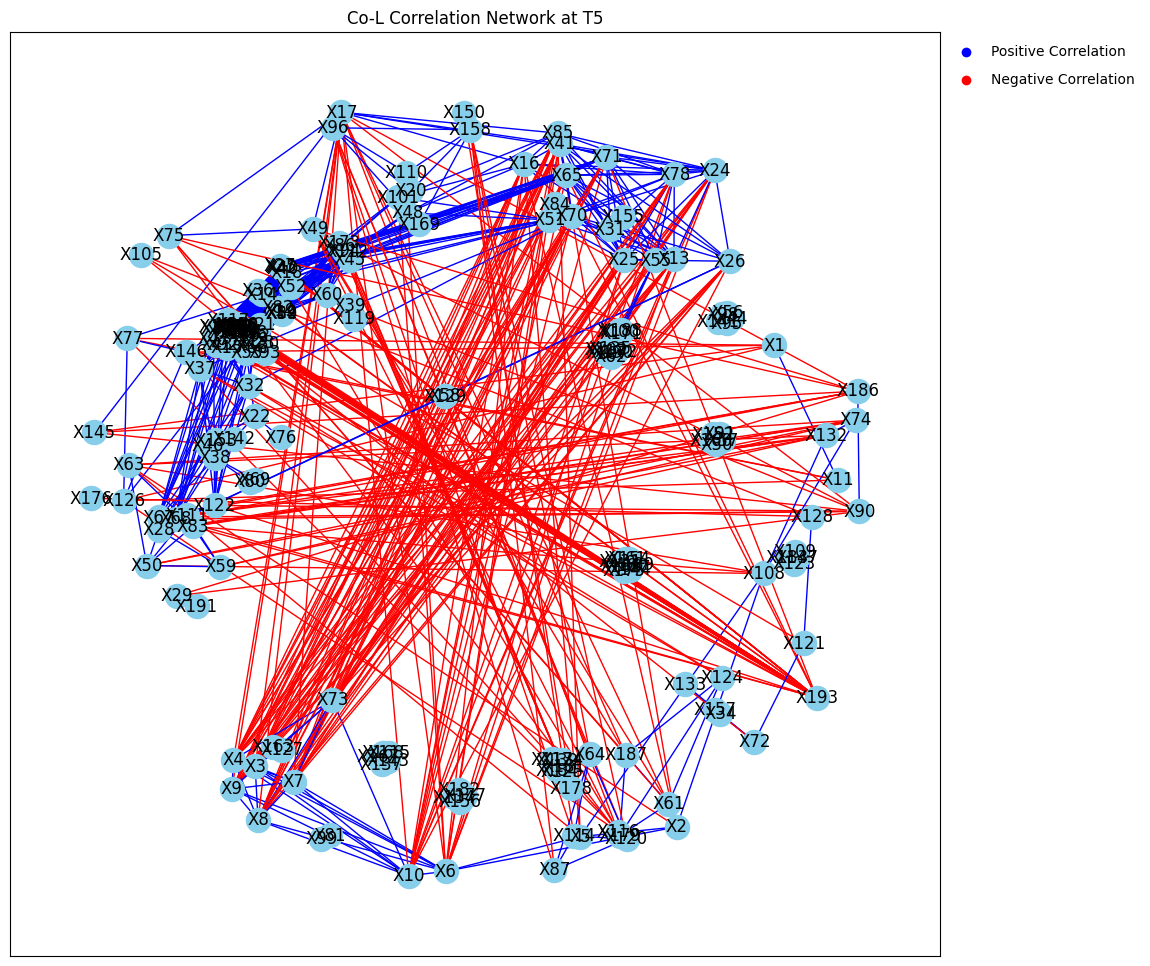

In [113]:
co_letrozole_boot_t5 = bootstrap_replicates(co_letrozolet5, 5000)
co_letrozole_corr_t5 = correlation_matrix(co_letrozole_boot_t5)
build_network_graph(co_letrozole_corr_t5, 0.8, title="Co-L Correlation Network at T5")

In [114]:
letrozole_stat_t5 = calculate_network_statistics(letrozole_corr_t5, 0.8)
placebo_stat_t5 = calculate_network_statistics(placebo_corr_t5, 0.8)

In [115]:
co_letrozole_stat_t5 = calculate_network_statistics(co_letrozole_corr_t5, 0.8)
co_placebo_stat_t5 = calculate_network_statistics(co_placebo_corr_t5, 0.8)

In [116]:
project_stats_t5 = {
    'Letrozole' : letrozole_stat_t5,
    'Placebo' : placebo_stat_t5,
    'Co-L' : co_letrozole_stat_t5,
    'Co-P' : co_placebo_stat_t5
}

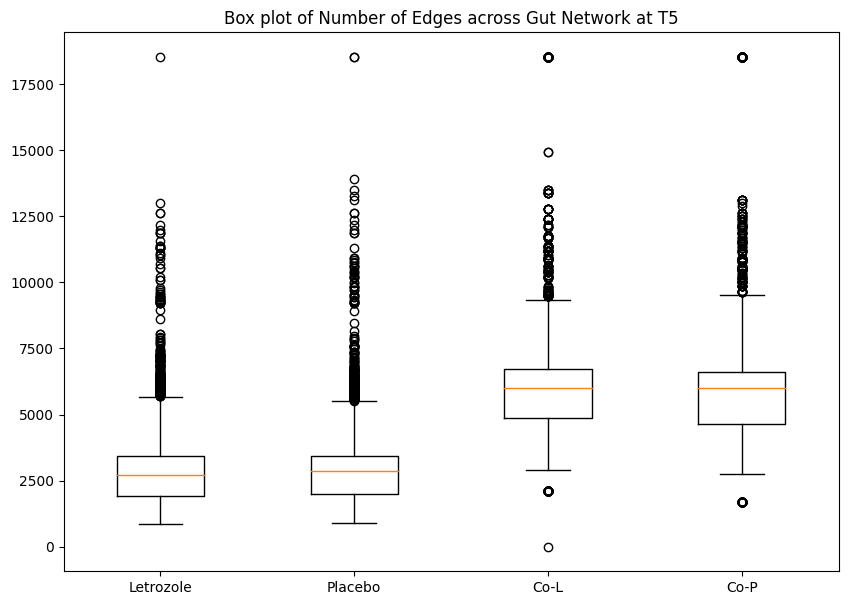

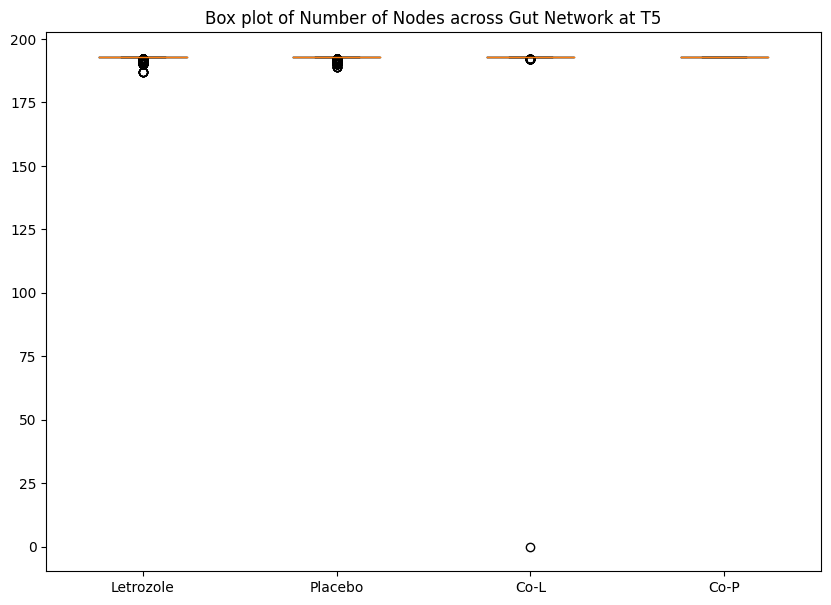

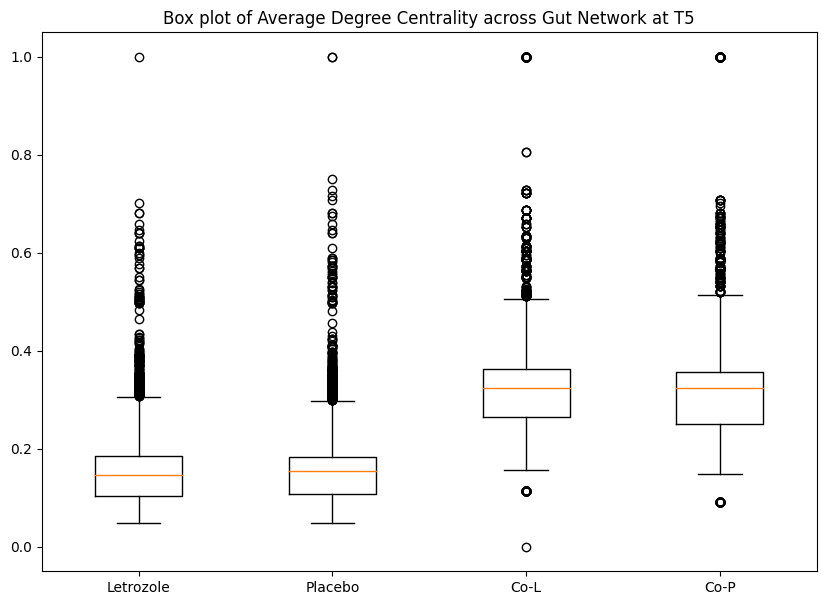

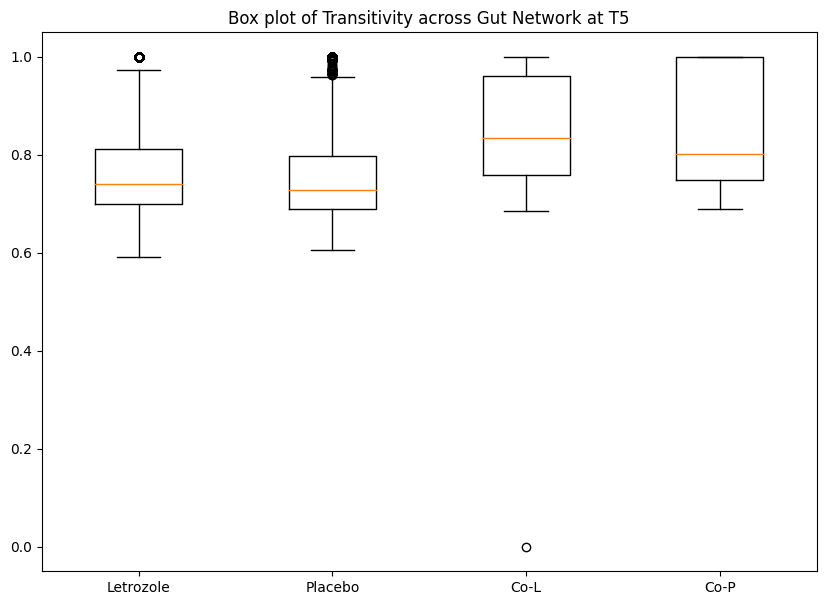

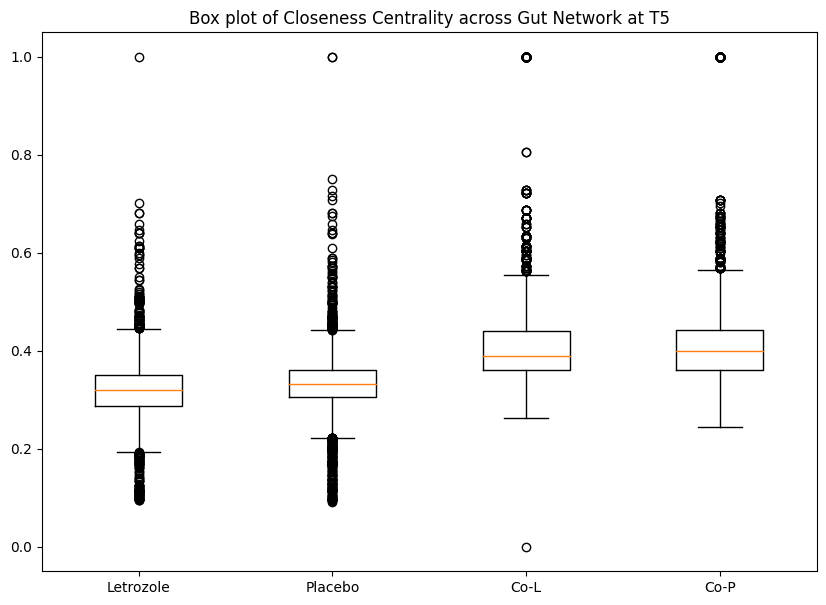

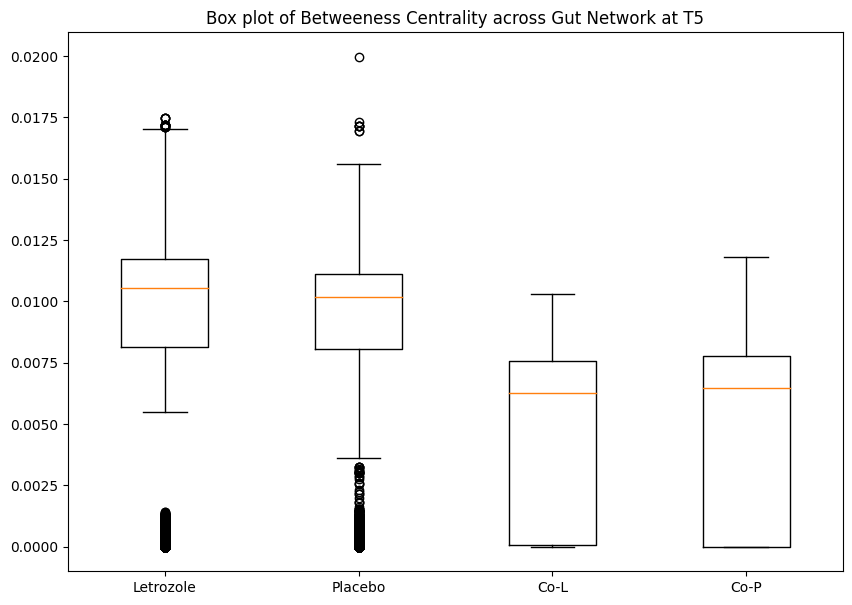

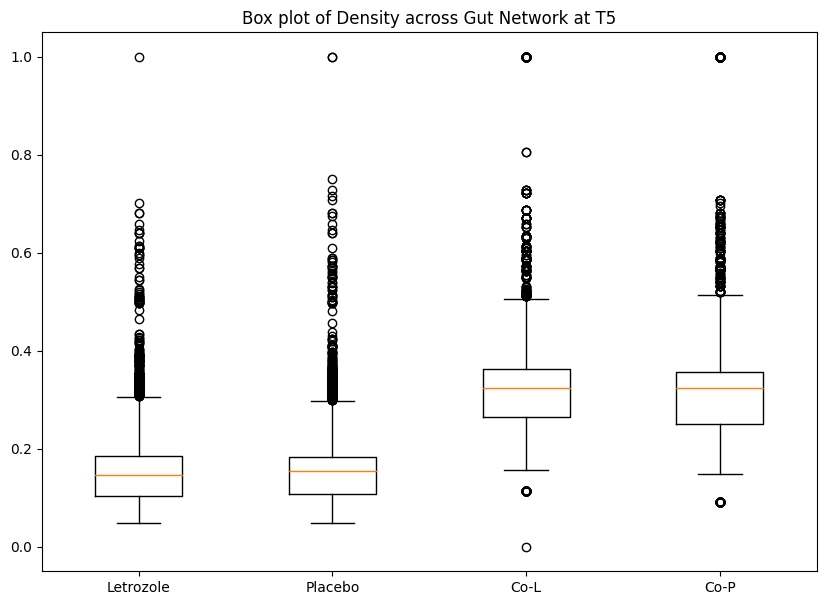

Letrozole_mean  Letrozole_sem  Placebo_mean  \
Number of Edges                  2989.052         21.140      3040.332   
Number of Nodes                   192.880          0.006       192.874   
Average Degree Centrality           0.161          0.001         0.164   
Transitivity                        0.765          0.001         0.756   
Closeness Centrality                0.320          0.001         0.331   
Betweeness Centrality               0.009          0.000         0.009   
Density                             0.161          0.001         0.164   

                           Placebo_sem  Co-L_mean  Co-L_sem  Co-P_mean  \
Number of Edges                 20.721   5906.048    33.329   5900.366   
Number of Nodes                  0.006    192.954     0.039    193.000   
Average Degree Centrality        0.001      0.319     0.002      0.318   
Transitivity                     0.001      0.852     0.001      0.844   
Closeness Centrality             0.001      0.408     0.001      0.413   
Betweeness Centrality            0.000      0.005     0.000      0.004   
Density                          0.001      0.319     0.002      0.318   

                           Co-P_sem  
Number of Edges              36.581  
Number of Nodes               0.000  
Average Degree Centrality     0.002  
Transitivity                  0.002  
Closeness Centrality          0.002  
Betweeness Centrality         0.000  
Density                       0.002

In [117]:
analyze_network_statistics(project_stats_t5, filename='gut_network_stats_t5.csv', project_name='Gut Network at T5')

# T2 vs T5

In [118]:
project_stats_t2_t5 = {
    'Letrozole T2' : letrozole_stat,
    'Letrozole T5' : letrozole_stat_t5,
    'Placebo T2' : placebo_stat,
    'Placebo T5' : placebo_stat_t5
}

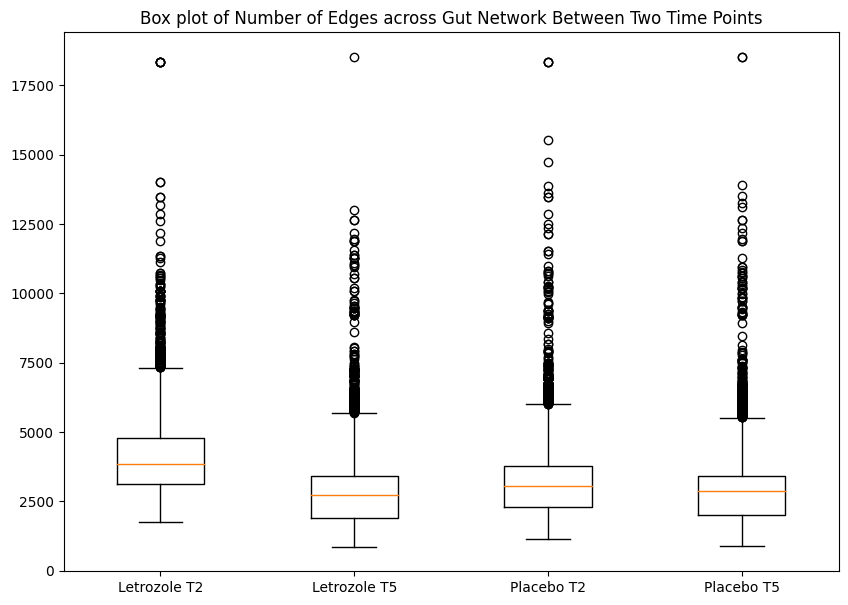

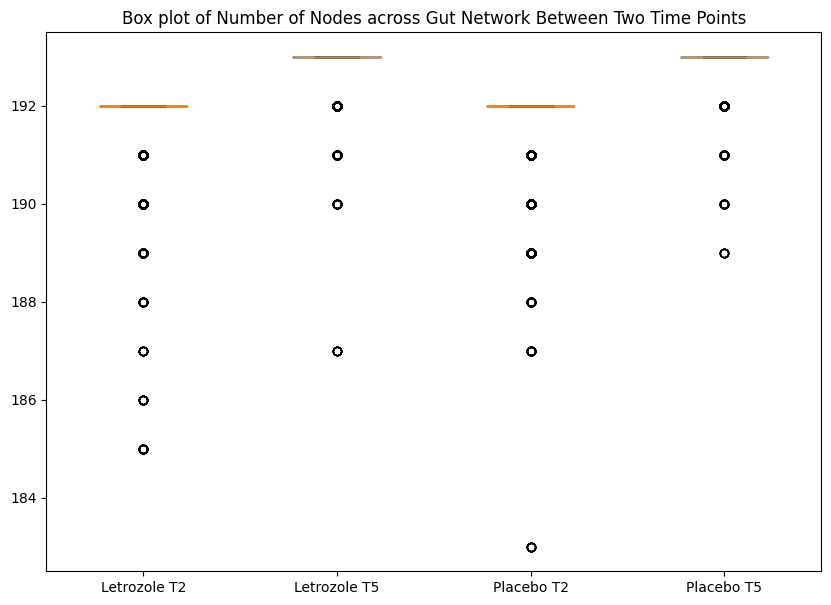

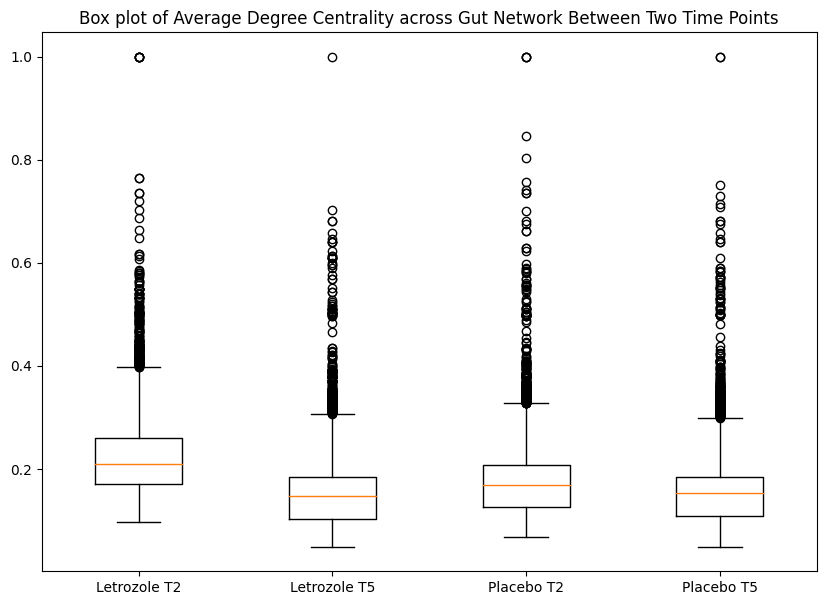

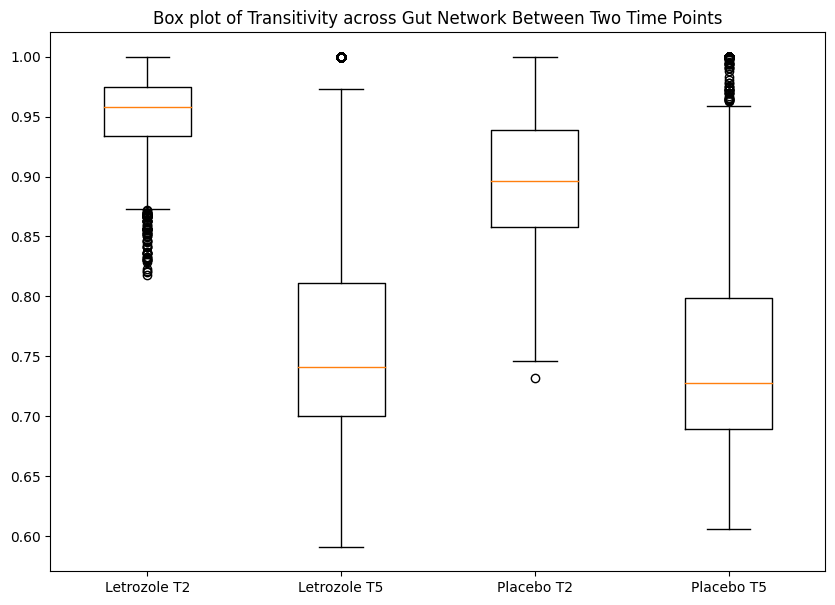

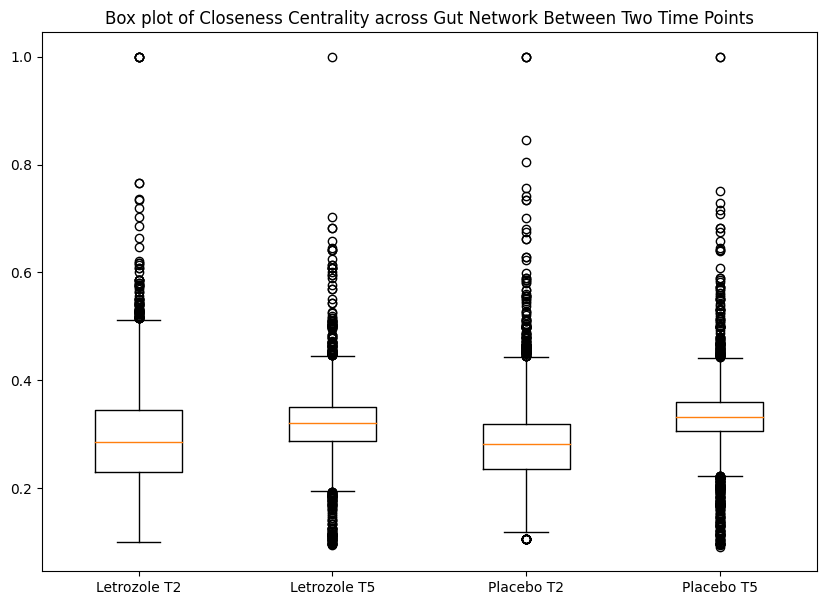

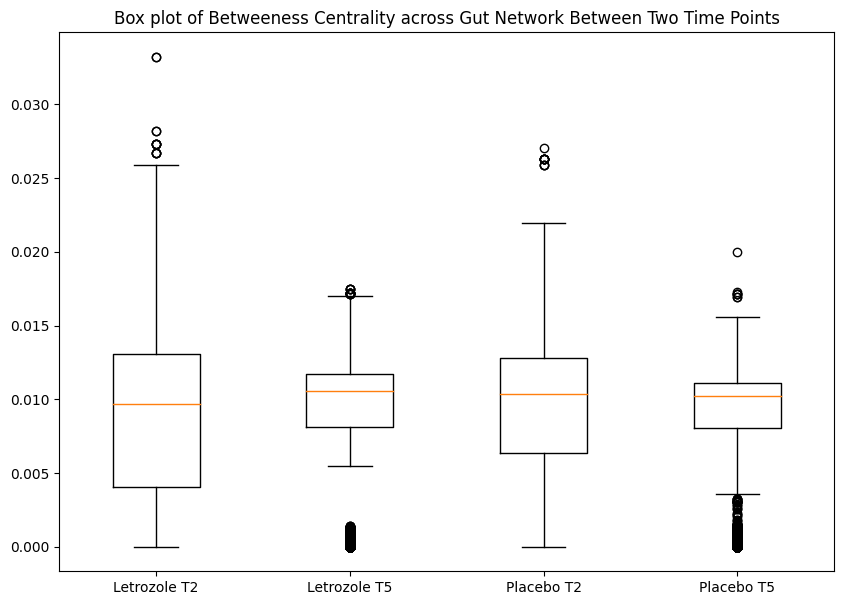

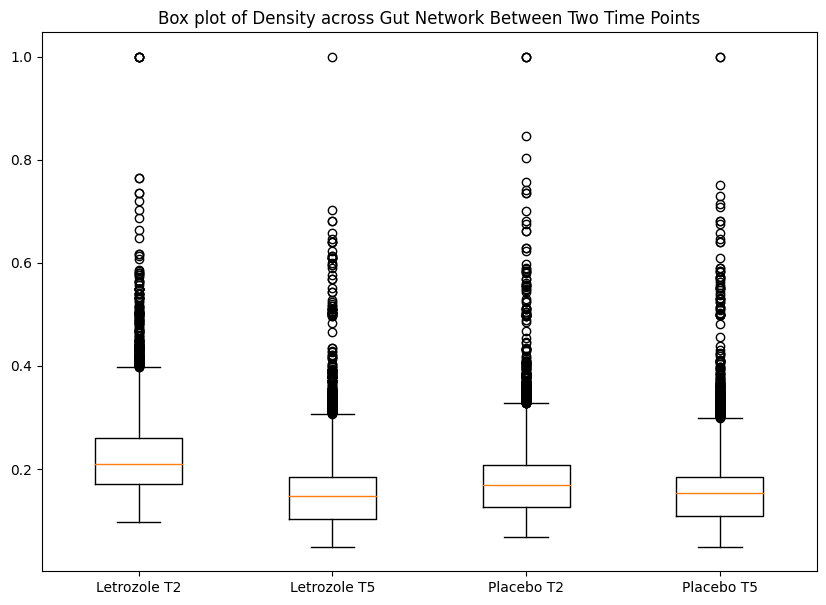

Letrozole T2_mean  Letrozole T2_sem  \
Number of Edges                     4162.837            22.586   
Number of Nodes                      191.614             0.013   
Average Degree Centrality              0.228             0.001   
Transitivity                           0.952             0.000   
Closeness Centrality                   0.291             0.001   
Betweeness Centrality                  0.009             0.000   
Density                                0.228             0.001   

                           Letrozole T5_mean  Letrozole T5_sem  \
Number of Edges                     2989.052            21.140   
Number of Nodes                      192.880             0.006   
Average Degree Centrality              0.161             0.001   
Transitivity                           0.765             0.001   
Closeness Centrality                   0.320             0.001   
Betweeness Centrality                  0.009             0.000   
Density                                0.161             0.001   

                           Placebo T2_mean  Placebo T2_sem  Placebo T5_mean  \
Number of Edges                   3315.707          21.271         3040.332   
Number of Nodes                    191.571           0.014          192.874   
Average Degree Centrality            0.181           0.001            0.164   
Transitivity                         0.897           0.001            0.756   
Closeness Centrality                 0.282           0.001            0.331   
Betweeness Centrality                0.009           0.000            0.009   
Density                              0.181           0.001            0.164   

                           Placebo T5_sem  
Number of Edges                    20.721  
Number of Nodes                     0.006  
Average Degree Centrality           0.001  
Transitivity                        0.001  
Closeness Centrality                0.001  
Betweeness Centrality               0.000  
Density                             0.001

In [119]:
analyze_network_statistics(project_stats_t2_t5, filename='gut_network_stats_t2_t5.csv', project_name='Gut Network Between Two Time Points')

In [120]:
net_stat_binomial_test(letrozole_stat, letrozole_stat_t5, title='letrozole t2 t5 binom.csv')

{'Number of Edges': BinomTestResult(k=3778, n=5000, alternative='two-sided', statistic=0.7556, pvalue=9.820522624477377e-300),
 'Number of Nodes': BinomTestResult(k=85, n=5000, alternative='two-sided', statistic=0.017, pvalue=0.0),
 'Average Degree Centrality': BinomTestResult(k=3818, n=5000, alternative='two-sided', statistic=0.7636, pvalue=1.00355e-319),
 'Transitivity': BinomTestResult(k=4742, n=5000, alternative='two-sided', statistic=0.9484, pvalue=0.0),
 'Closeness Centrality': BinomTestResult(k=1860, n=5000, alternative='two-sided', statistic=0.372, pvalue=6.3649293828191164e-74),
 'Betweeness Centrality': BinomTestResult(k=2450, n=5000, alternative='two-sided', statistic=0.49, pvalue=0.16148522239737653),
 'Density': BinomTestResult(k=3818, n=5000, alternative='two-sided', statistic=0.7636, pvalue=1.00355e-319)}

In [121]:
net_stat_binomial_test(letrozole_stat, letrozole_stat_t5, title='letrozole t2 t5 binom.csv')

{'Number of Edges': BinomTestResult(k=3778, n=5000, alternative='two-sided', statistic=0.7556, pvalue=9.820522624477377e-300),
 'Number of Nodes': BinomTestResult(k=85, n=5000, alternative='two-sided', statistic=0.017, pvalue=0.0),
 'Average Degree Centrality': BinomTestResult(k=3818, n=5000, alternative='two-sided', statistic=0.7636, pvalue=1.00355e-319),
 'Transitivity': BinomTestResult(k=4742, n=5000, alternative='two-sided', statistic=0.9484, pvalue=0.0),
 'Closeness Centrality': BinomTestResult(k=1860, n=5000, alternative='two-sided', statistic=0.372, pvalue=6.3649293828191164e-74),
 'Betweeness Centrality': BinomTestResult(k=2450, n=5000, alternative='two-sided', statistic=0.49, pvalue=0.16148522239737653),
 'Density': BinomTestResult(k=3818, n=5000, alternative='two-sided', statistic=0.7636, pvalue=1.00355e-319)}

In [122]:
species_dictionary.iloc[12]

OTUID                          0f54807ebcdb7fa491db917beeb3595e
Feature.ID                                                  X13
Kingdom                                             k__Bacteria
Phylum                                         p__Bacteroidetes
Class                                            c__Bacteroidia
Order                                          o__Bacteroidales
Family                                                 f__S24-7
Genus                                                       g__
confidence                                                  1.0
Taxa           p__Bacteroidetes,  c__Bacteroidia,  o__Bacter...
Name: 12, dtype: object